In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import statsmodels.tsa.api as sm

In [2]:
df = pd.read_csv("ibm-common-stock-closing-prices.csv")
df.drop(1008, inplace=True)
df["Date"] = df["Date"].astype("datetime64")
df.rename(columns = { "IBM common stock closing prices": "Closing"} , inplace=True)
model = sm.ARIMA(df["Closing"], order=(1, 0 , 0)).fit()

Changing model.predict() to model.forecast()

In [3]:
pred_time = 20

# I originally used predict
results = model.forecast(pred_time)

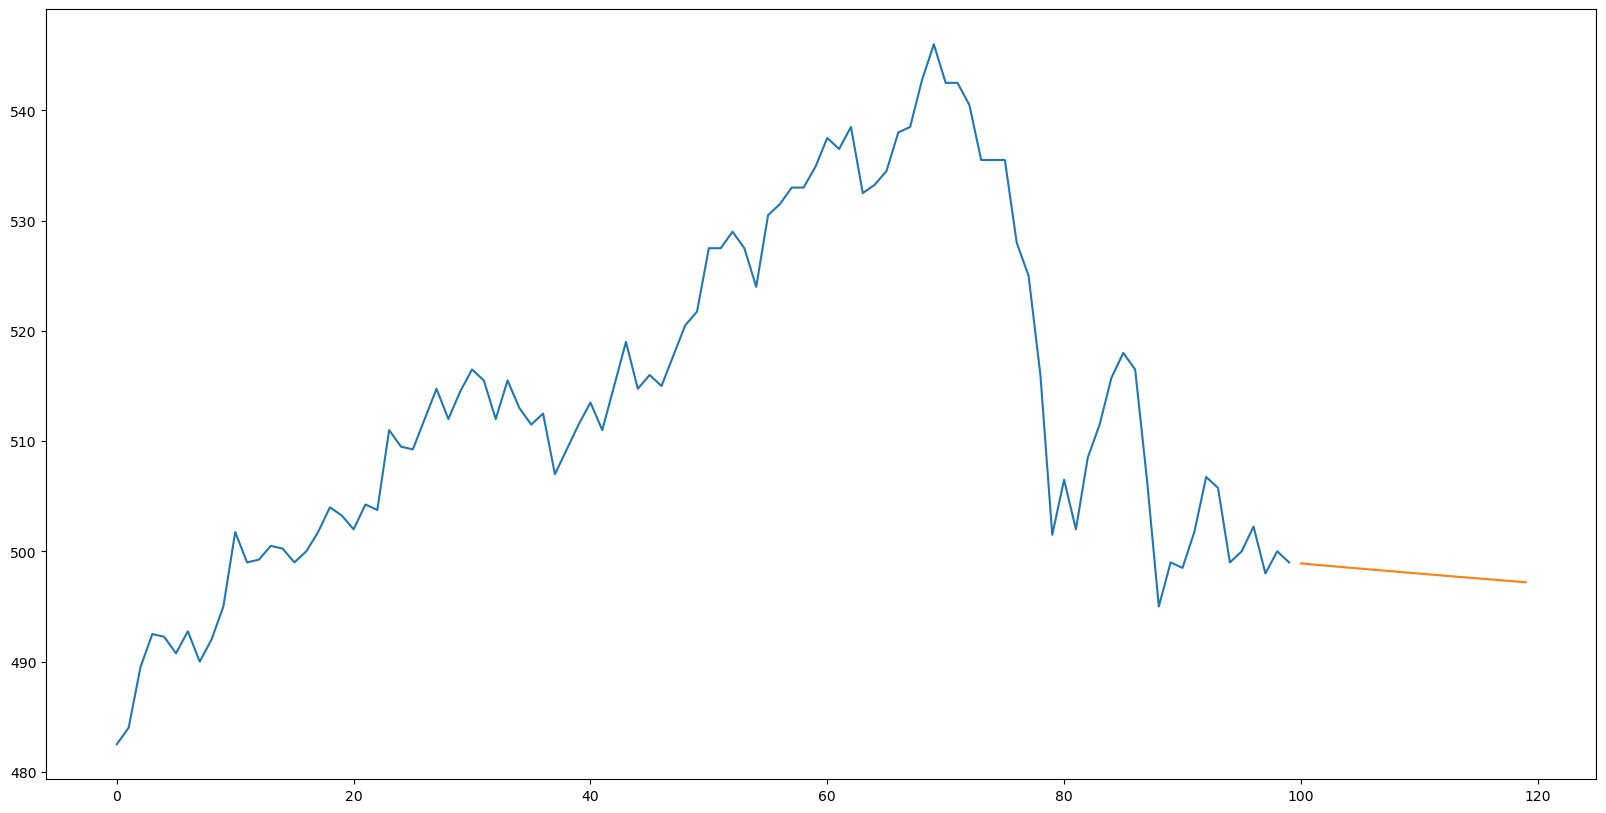

In [4]:
import matplotlib.pyplot as plt

lagsDisplayed = 100

plt.figure(figsize=(20,10))
plt.plot(
    range(lagsDisplayed), 
    df["Closing"][-lagsDisplayed:]
)

plt.plot(
    range(lagsDisplayed, lagsDisplayed + pred_time), 
    results
);

In [6]:
model.predict(start=df["Closing"].shape[0]+10, end=df["Closing"].shape[0]+20) 

1018    497.983560
1019    497.894193
1020    497.805320
1021    497.716937
1022    497.629044
1023    497.541636
1024    497.454711
1025    497.368267
1026    497.282301
1027    497.196810
1028    497.111791
Name: predicted_mean, dtype: float64